# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [87]:
# Loading necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology , color

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


Image 1 shape: (100, 100)
Image 2 shape: (100, 100)
Image 3 shape: (100, 100)


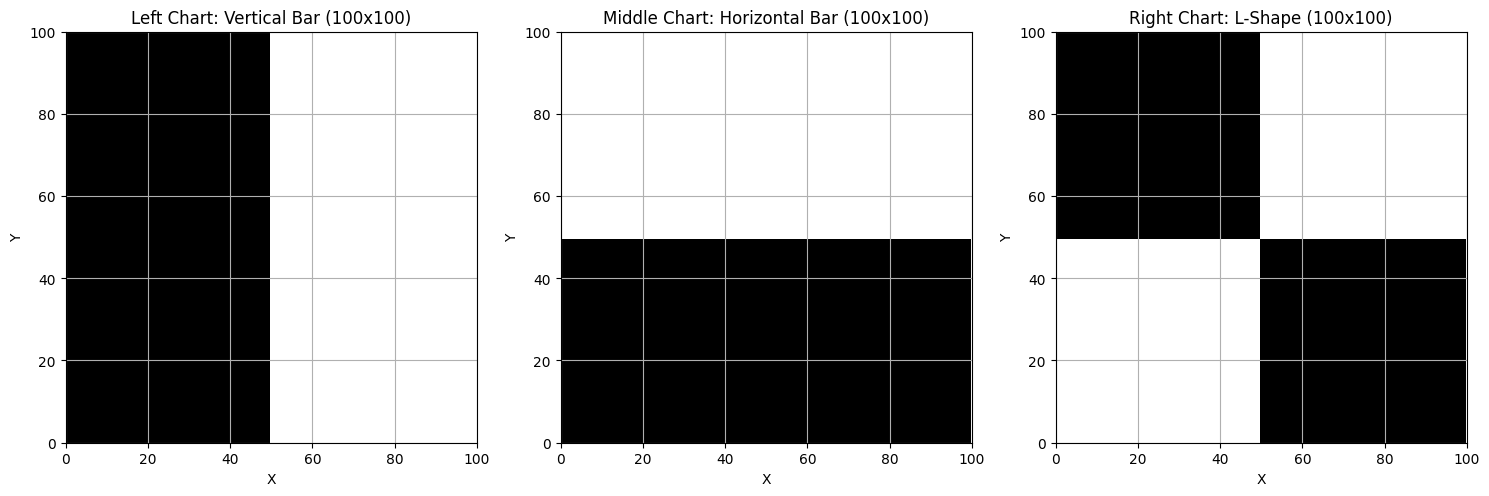

In [88]:
# Create 100x100 images for each visualization (explicitly 100x100)
image1 = np.ones((100, 100))  # Start with white (1) for a 100x100 image
image2 = np.ones((100, 100))  # Start with white (1) for a 100x100 image
image3 = np.ones((100, 100))  # Start with white (1) for a 100x100 image

# Left Chart: Vertical black bar (x=0 to 25, y=0 to 100) in a 100x100 image
# Black vertical bar, 25% width (25 pixels), full height (100 pixels)
image1[:, 0:50] = 0  # Black from x=0 to 25, y=0 to 100

# Middle Chart: Horizontal black bar (x=0 to 100, y=0 to 40) in a 100x100 image
# Black horizontal bar, full width (100 pixels), 40% height (40 pixels)
image2[0:50, :] = 0  # Black from y=0 to 40, x=0 to 100

# Right Chart: L-shaped black region in a 100x100 image
# Black in bottom-left (x=0 to 50, y=50 to 100) and top-right (x=50 to 100, y=0 to 50)
image3[50:, 0:50] = 0  # Black in bottom-left (x=0 to 50, y=50 to 100)
image3[0:50, 50:] = 0  # Black in top-right (x=50 to 100, y=0 to 50)

# Verify the shapes (explicitly 100x100)
print("Image 1 shape:", image1.shape)  # Should print (100, 100)
print("Image 2 shape:", image2.shape)  # Should print (100, 100)
print("Image 3 shape:", image3.shape)  # Should print (100, 100)

# Visualize in a 1x3 subplot with the same size and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Set the same size for all subplots (100x100 pixels in the image data)
for ax in axs:
    ax.set_xlim(0, 100)  # Set x-axis limits to match 100x100 image
    ax.set_ylim(0, 100)  # Set y-axis limits to match 100x100 image
    ax.set_aspect('equal')  # Ensure the aspect ratio is 1:1 for same size

# Display each 100x100 image with axes
axs[0].imshow(image1, cmap='gray')
axs[0].set_title('Left Chart: Vertical Bar (100x100)')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)  # Add grid for reference

axs[1].imshow(image2, cmap='gray')
axs[1].set_title('Middle Chart: Horizontal Bar (100x100)')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid(True)  # Add grid for reference

axs[2].imshow(image3, cmap='gray')
axs[2].set_title('Right Chart: L-Shape (100x100)')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].grid(True)  # Add grid for reference

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

Color image shape: (100, 100, 3)


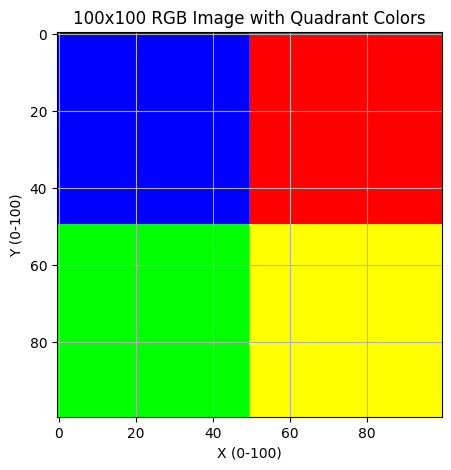

In [89]:
# Create a 100x100 RGB image, starting with white (all ones, scaled to 255 for RGB)
color_image = np.ones((100, 100, 3)) * 255  # White = [255, 255, 255]

# Assign colors to each quadrant
# Top-left (x=0 to 50, y=0 to 50) = Blue [0, 0, 255]
color_image[0:50, 0:50, :] = [0, 0, 255]  # Blue

# Top-right (x=50 to 100, y=0 to 50) = Red [255, 0, 0]
color_image[0:50, 50:100, :] = [255, 0, 0]  # Red

# Bottom-left (x=0 to 50, y=50 to 100) = Green [0, 255, 0]
color_image[50:100, 0:50, :] = [0, 255, 0]  # Green

# Bottom-right (x=50 to 100, y=50 to 100) = Yellow [255, 255, 0]
color_image[50:100, 50:100, :] = [255, 255, 0]  # Yellow

# Verify the shape (explicitly 100x100x3)
print("Color image shape:", color_image.shape)  # Should print (100, 100, 3)

# Visualize the 100x100 RGB image with axes
plt.figure(figsize=(5, 5))
plt.imshow(color_image)
plt.title('100x100 RGB Image with Quadrant Colors')
plt.xlabel('X (0-100)')
plt.ylabel('Y (0-100)')
plt.grid(True)  # Add grid for reference
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



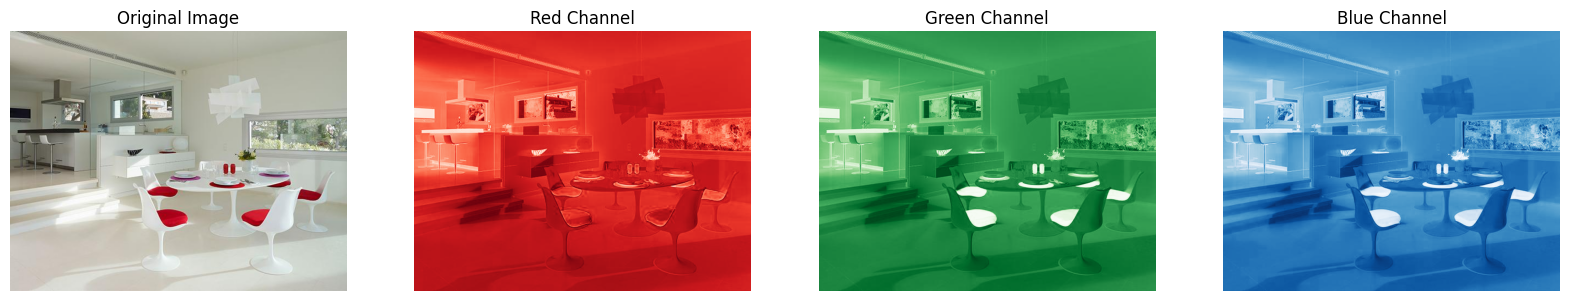

In [90]:
# Load the image
image_path = "sillas.jpg"  # Update with the correct path if needed
image = cv2.imread(image_path)

# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels
r, g, b = cv2.split(image_rgb)

# Plot original image and its individual color channels
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Red channel
axes[1].imshow(r, cmap="Reds")
axes[1].set_title("Red Channel")
axes[1].axis("off")

# Green channel
axes[2].imshow(g, cmap="Greens")
axes[2].set_title("Green Channel")
axes[2].axis("off")

# Blue channel
axes[3].imshow(b, cmap="Blues")
axes[3].set_title("Blue Channel")
axes[3].axis("off")

# Show the plot
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

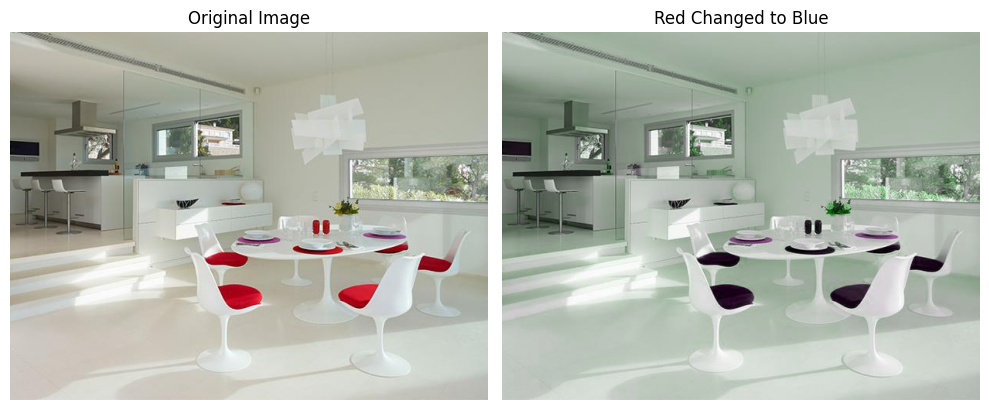

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image (assuming it's in RGB format, replace 'sillas.jpg' with your image path)
image = plt.imread('sillas.jpg')  # Reads as RGB by default with matplotlib

# Extract the blue channel (index 2 in RGB, since RGB order is [R, G, B])
blue_channel = image[:, :, 2]

# Create a copy of the image to modify
copy_image = np.copy(image)
copy_image[:, :, 0] = blue_channel  # Replace red channel (index 0) with blue channel

# Create subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Match the figsize from the cv2 example

# Original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Modified image
axes[1].imshow(copy_image)
axes[1].set_title("Red Changed to Blue")
axes[1].axis("off")

# Use tight_layout() for better spacing (as in your original code)
plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

# **Load the Images**

In [92]:
# Load the images using OpenCV (adjust paths as necessary)
model_image = cv2.imread('/content/model.png')
coat_image = cv2.imread('/content/coat.png')
texture_image = cv2.imread('/content/texture2.png')  # Red texture image

# **Create the Model with Coat (Using Masks)**

In [93]:
# Convert all images to RGB for correct color display in Matplotlib
model_image = cv2.cvtColor(model_image, cv2.COLOR_BGR2RGB)
coat_image = cv2.cvtColor(coat_image, cv2.COLOR_BGR2RGB)
texture_image = cv2.cvtColor(texture_image, cv2.COLOR_BGR2RGB)

# Convert coat image to HSV for better color-based masking
coat_hsv = cv2.cvtColor(coat_image, cv2.COLOR_RGB2HSV)

# Define HSV range for yellow coat (adjust these values based on the coat color in coat.png)
yellow_lower = np.array([20, 100, 100])  # Lower bound for yellow in HSV
yellow_upper = np.array([40, 255, 255])  # Upper bound for yellow in HSV
coat_mask = cv2.inRange(coat_hsv, yellow_lower, yellow_upper)

# Expand the mask to 3 channels for RGB overlay
coat_mask_3d = np.stack([coat_mask] * 3, axis=-1)

# Resize coat and texture to match the model image’s dimensions
coat_resized = cv2.resize(coat_image, (model_image.shape[1], model_image.shape[0]))
texture_resized = cv2.resize(texture_image, (model_image.shape[1], model_image.shape[0]))
coat_mask_resized = cv2.resize(coat_mask_3d, (model_image.shape[1], model_image.shape[0]), interpolation=cv2.INTER_NEAREST)

# **Apply Texture to the Coat**

In [94]:
# Apply the yellow coat to the model using the mask
model_with_coat = model_image.copy()
model_with_coat[coat_mask_resized == 255] = coat_resized[coat_mask_resized == 255]

# Apply the red texture to the coat region using the same mask
textured_coat = coat_resized.copy()
textured_coat[coat_mask == 255] = texture_resized[coat_mask == 255]

# Overlay the textured coat onto the model
model_with_textured_coat = model_image.copy()
model_with_textured_coat[coat_mask_resized == 255] = textured_coat[coat_mask_resized == 255]

# **Visualize the Images**

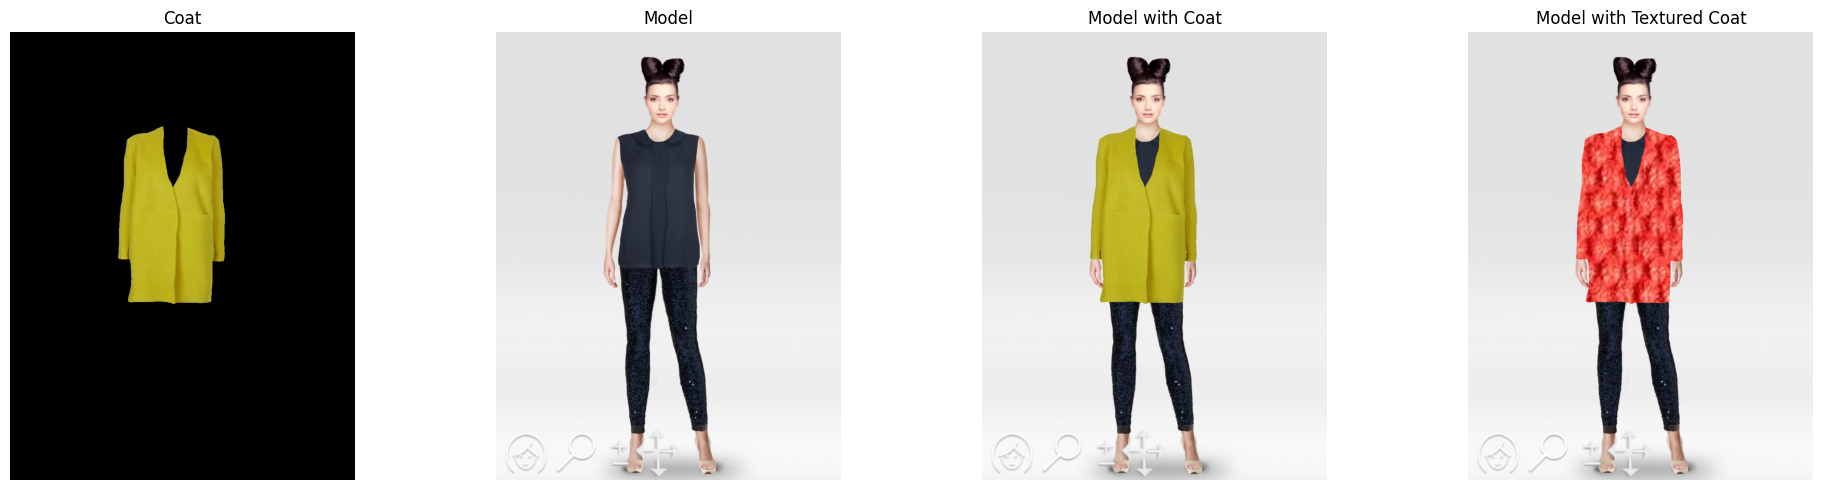

In [95]:
# Create a 1x4 subplot visualization to match your attached image
plt.figure(figsize=(20, 5))

# Coat
plt.subplot(141)
plt.imshow(coat_image)
plt.title("Coat")
plt.axis('off')

# Model
plt.subplot(142)
plt.imshow(model_image)
plt.title("Model")
plt.axis('off')

# Model with Coat
plt.subplot(143)
plt.imshow(model_with_coat)
plt.title("Model with Coat")
plt.axis('off')

# Model with Textured Coat
plt.subplot(144)
plt.imshow(model_with_textured_coat)
plt.title("Model with Textured Coat")
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




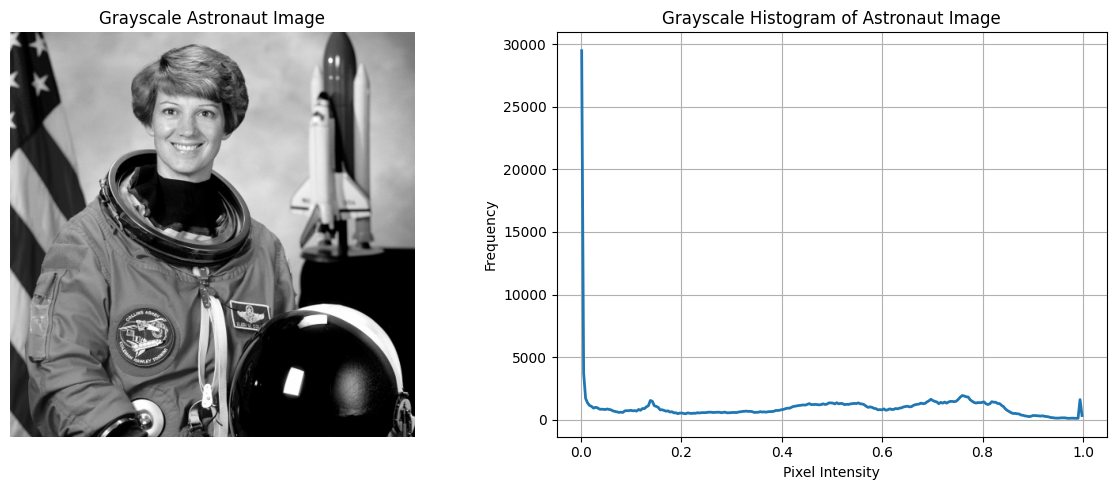

In [96]:
# Read the astronaut image
image_1 = data.astronaut()

# Convert the image to grayscale
gray_image = color.rgb2gray(image_1)

# Compute the histogram
histogram, bin_centers = exposure.histogram(gray_image)

# Plot the histogram
plt.figure(figsize=(12, 5))

# First subplot: display the grayscale image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Astronaut Image')
plt.axis('off')  # Hide axes for the image

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(bin_centers, histogram, lw=2)
plt.title('Grayscale Histogram of Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)


# Adjust layout and display
plt.tight_layout()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

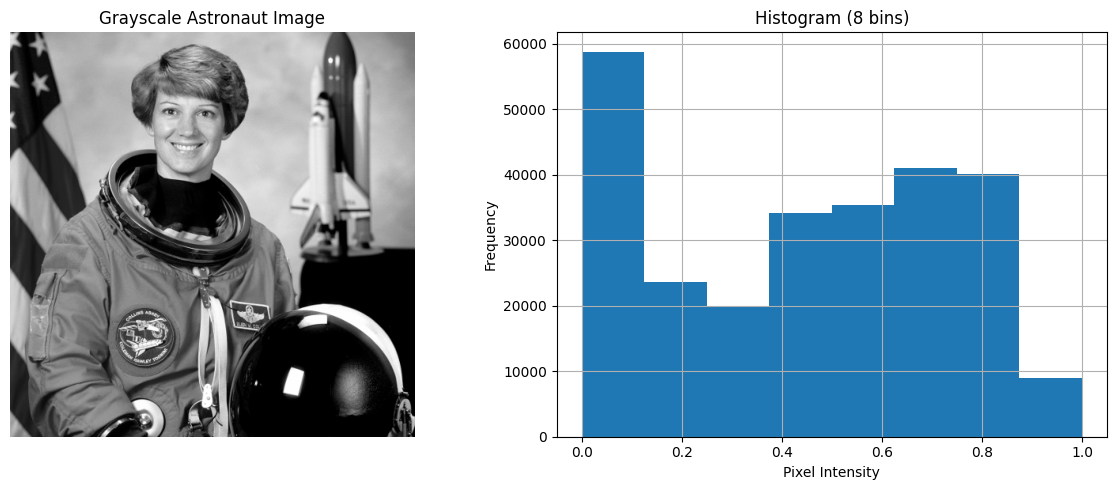

In [97]:
# Convert the image to grayscale
gray_image = color.rgb2gray(image_1)

# Compute the histogram with 8 bins
histogram, bin_centers = exposure.histogram(gray_image, nbins=8)

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# First subplot: display the grayscale image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Astronaut Image')
plt.axis('off')  # Hide axes for the image

# Second subplot: plot the histogram as bars
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.bar(bin_centers, histogram, width=(bin_centers[1] - bin_centers[0]), align='center')
plt.title('Histogram (8 bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

**Question 1:** The number of bins in a histogram affects how detailed or smooth the distribution appears. Fewer bins group data into larger ranges, resulting in a smoother histogram that may obscure important details. In contrast, a higher number of bins provides more detail but can introduce noise or highlight insignificant variations.

Choosing the correct number of bins requires balancing detail and noise. Common methods for determining bin count include:



*   Sturges’ rule: Bins = ceil(log2(n) + 1), where n is the number of data points.
*   Square-root rule: Bins = sqrt(n).
*   Visual inspection: Adjusting the bin count to reveal meaningful patterns without excessive noise.



**Question 2:**


*   **Very low bin count:** Oversimplifies the distribution, hiding important features or patterns (e.g., peaks, valleys) due to coarse grouping, potentially leading to misleading interpretations.
*   **Very high bin count:** Overcomplicates the distribution, showing excessive detail or noise, making it hard to identify meaningful trends and risking overfitting to random variations in the data.








...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


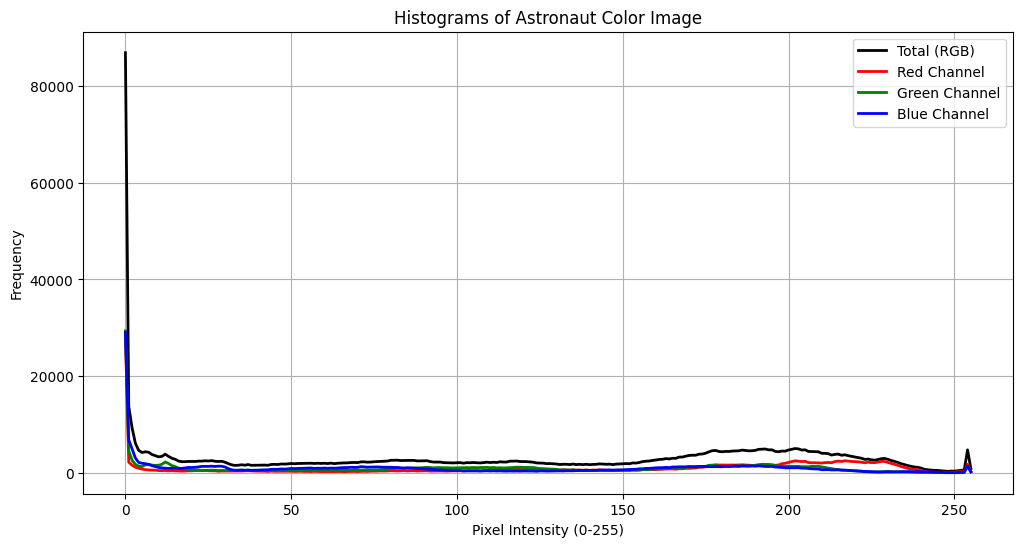

In [98]:
# Compute histogram for the entire color image (all channels combined)
# Flatten the image to get all pixel values
all_pixels = image_1.flatten()
total_histogram, total_bins = exposure.histogram(all_pixels, nbins=256)

# Compute histograms for each color channel (Red, Green, Blue)
r_channel = image_1[:, :, 0].flatten()  # Red channel
g_channel = image_1[:, :, 1].flatten()  # Green channel
b_channel = image_1[:, :, 2].flatten()  # Blue channel

r_histogram, r_bins = exposure.histogram(r_channel, nbins=256)
g_histogram, g_bins = exposure.histogram(g_channel, nbins=256)
b_histogram, b_bins = exposure.histogram(b_channel, nbins=256)

# Create a single plot with all histograms
plt.figure(figsize=(12, 6))

# Plot total histogram (all channels combined)
plt.plot(total_bins, total_histogram, lw=2, label='Total (RGB)', color='black')

# Plot histograms for each channel
plt.plot(r_bins, r_histogram, lw=2, label='Red Channel', color='red')
plt.plot(g_bins, g_histogram, lw=2, label='Green Channel', color='green')
plt.plot(b_bins, b_histogram, lw=2, label='Blue Channel', color='blue')

# Add labels, title, and legend
plt.title('Histograms of Astronaut Color Image')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



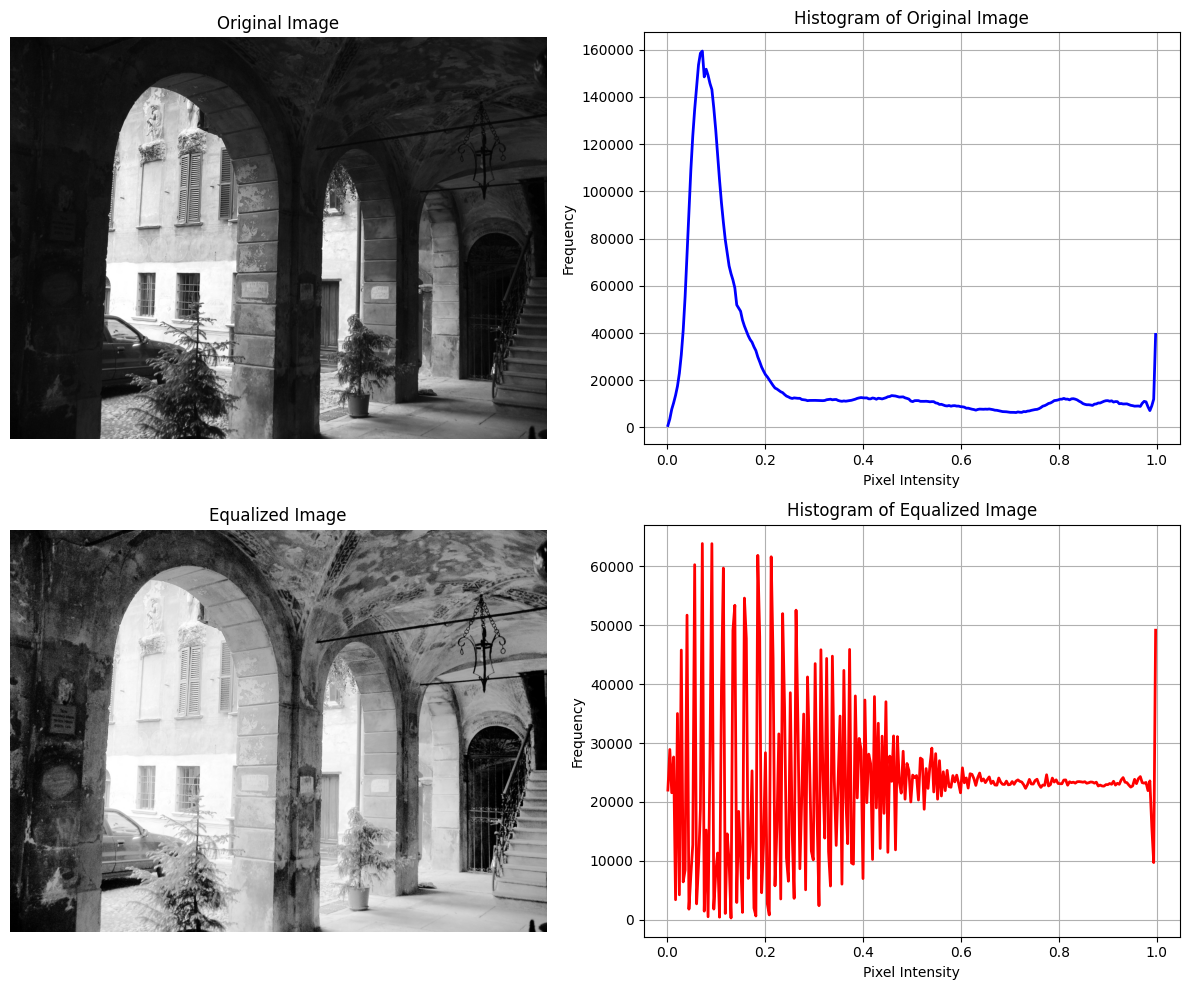

In [99]:
# Read the image (replace 'aquatermi_lowcontrast.jpg' with your image path or name)
image = io.imread('aquatermi_lowcontrast.jpg', as_gray=True)  # Read as grayscale for simplicity

# Compute histogram of the original image
hist_original, bins_original = exposure.histogram(image)

# Perform histogram equalization
equalized_image = exposure.equalize_hist(image)

# Compute histogram of the equalized image
hist_equalized, bins_equalized = exposure.histogram(equalized_image)

# Create a 2x2 subplot
plt.figure(figsize=(12, 10))

# 1. Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 2. Histogram of original image
plt.subplot(2, 2, 2)
plt.plot(bins_original, hist_original, lw=2, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# 3. Equalized image
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# 4. Histogram of equalized image
plt.subplot(2, 2, 4)
plt.plot(bins_equalized, hist_equalized, lw=2, color='red')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram equalization (used in equalize_hist) spreads out pixel values to make the image’s brightness more even and contrast stronger, but it can look a bit artificial. It uses a special math trick (CDF) to balance the colors. Linear contrast stretch just stretches the darkest and brightest parts of the image to use the full brightness range, keeping things more natural but not boosting contrast as much. Equalization changes the image more dramatically, while linear stretch is straightforward and subtle.

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



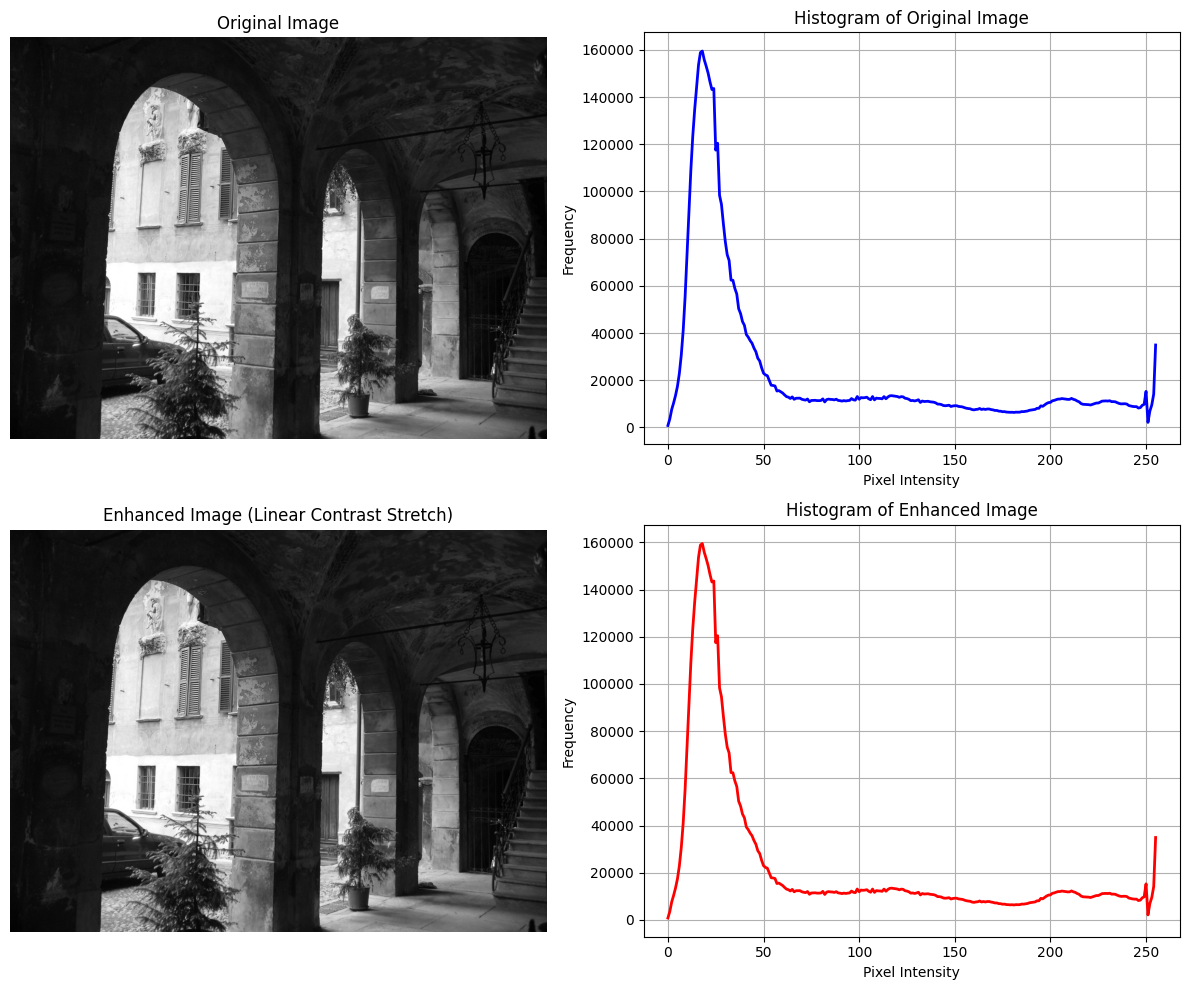

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def linear_contrast_stretch(image, bin_count=256):
    """
    Perform linear contrast stretch on a grayscale image without using built-in functions.

    Parameters:
    - image: NumPy array of grayscale image (values typically 0-255 or 0-1)
    - bin_count: Number of bins for histogram computation (default=256 for 8-bit images)

    Returns:
    - enhanced_image: NumPy array of the enhanced image after linear contrast stretch
    """
    # Ensure image is 2D (grayscale)
    if len(image.shape) > 2:
        raise ValueError("Image must be grayscale (2D array)")

    # Get min and max pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # If min and max are the same, return original image to avoid division by zero
    if min_val == max_val:
        return image.copy()

    # Apply linear contrast stretch: new_value = (old_value - min) * (max_new - min_new) / (max_old - min_old) + min_new
    # Here, we stretch to the full range [0, 1] for normalization, then scale back to [0, 255] if needed
    enhanced_image = (image - min_val) * (1.0 / (max_val - min_val))

    # Scale back to 0-255 if the input is in that range (assuming 8-bit image)
    if max_val <= 255 and min_val >= 0:
        enhanced_image = enhanced_image * 255

    # Clip values to ensure they stay within [0, 255] or [0, 1] based on input range
    enhanced_image = np.clip(enhanced_image, 0, 255 if max_val <= 255 else 1)

    return enhanced_image.astype(np.uint8) if max_val <= 255 else enhanced_image

# Load the aquatermi_lowcontrast.jpg image as grayscale
image = io.imread('aquatermi_lowcontrast.jpg', as_gray=True)  # Read as grayscale

# Set bin count for histogram
bin_count = 256  # Default bin count for 8-bit images

# Compute histograms manually (without skimage.exposure)
def compute_histogram(image, bins):
    hist = np.zeros(bins, dtype=np.int32)
    # Scale image to 0-255 if in 0-1 range
    if np.max(image) <= 1:
        image = image * 255
    # Create bins and count frequencies
    bin_size = 256 / bins
    for val in image.flatten():
        bin_idx = int(val / bin_size)
        if bin_idx >= bins:
            bin_idx = bins - 1  # Handle edge case
        hist[bin_idx] += 1
    bin_centers = np.linspace(0, 255, bins)
    return hist, bin_centers

# Compute histograms for original and enhanced images
hist_original, bins_original = compute_histogram(image, bin_count)
enhanced_image = linear_contrast_stretch(image, bin_count)
hist_enhanced, bins_enhanced = compute_histogram(enhanced_image, bin_count)

# Create 2x2 subplot
plt.figure(figsize=(12, 10))

# 1. Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 2. Histogram of original image
plt.subplot(2, 2, 2)
plt.plot(bins_original, hist_original, lw=2, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# 3. Enhanced image
plt.subplot(2, 2, 3)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image (Linear Contrast Stretch)')
plt.axis('off')

# 4. Histogram of enhanced image
plt.subplot(2, 2, 4)
plt.plot(bins_enhanced, hist_enhanced, lw=2, color='red')
plt.title('Histogram of Enhanced Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




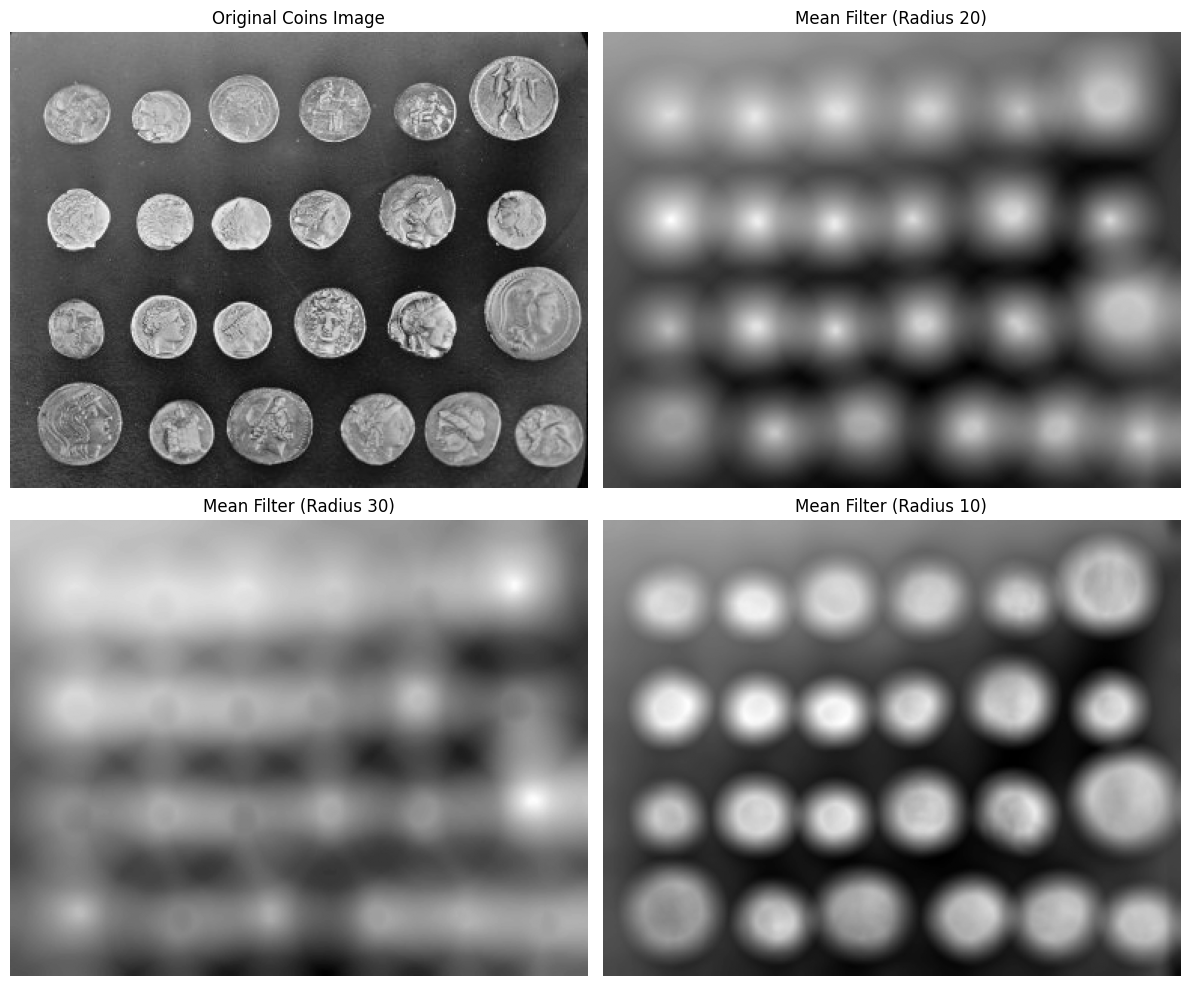

In [101]:
# Import required libraries

from scipy.ndimage import generic_filter

# Load the coins image
original_image = data.coins()

# Define disk structuring elements with different radii
radius_20 = morphology.disk(20)  # Disk structuring element with radius 20
radius_30 = morphology.disk(30)  # Disk structuring element with radius 30 (increased by 10)
radius_10 = morphology.disk(10)  # Disk structuring element with radius 10 (reduced by 10)

# Apply mean filter with each structuring element using generic_filter
# The mean filter computes the average of pixels within the structuring element
smoothed_20 = generic_filter(original_image, np.mean, footprint=radius_20)
smoothed_30 = generic_filter(original_image, np.mean, footprint=radius_30)
smoothed_10 = generic_filter(original_image, np.mean, footprint=radius_10)

# Create a 2x2 subplot to visualize all images
plt.figure(figsize=(12, 10))

# 1. Original image
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

# 2. Smoothed image with radius 20
plt.subplot(2, 2, 2)
plt.imshow(smoothed_20, cmap='gray')
plt.title('Mean Filter (Radius 20)')
plt.axis('off')

# 3. Smoothed image with radius 30
plt.subplot(2, 2, 3)
plt.imshow(smoothed_30, cmap='gray')
plt.title('Mean Filter (Radius 30)')
plt.axis('off')

# 4. Smoothed image with radius 10
plt.subplot(2, 2, 4)
plt.imshow(smoothed_10, cmap='gray')
plt.title('Mean Filter (Radius 10)')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-102-97ffa96f0c67>:9: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  square_selem = morphology.square(size)
<ipython-input-102-97ffa96f0c67>:12: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  rectangle_selem = morphology.rectangle(size, size + 5)  # 15x20 rectangle


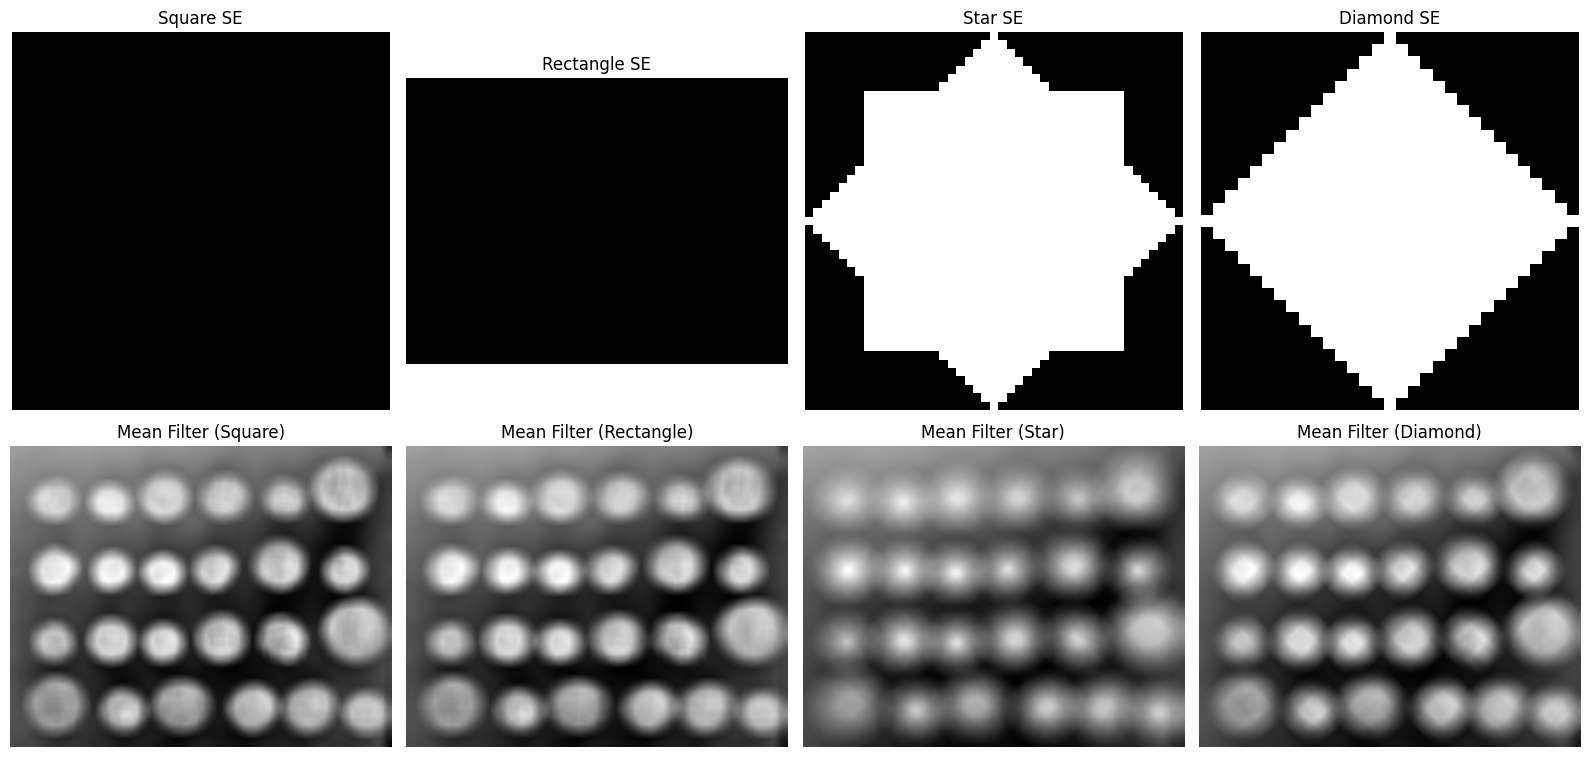

In [102]:
# Load the coins image
original_image = data.coins()

# Define different structuring elements with an "optimal" size
# Choosing size 15 as a balanced parameter for visibility and smoothing (you can adjust if needed)
size = 15

# Square structuring element (15x15)
square_selem = morphology.square(size)

# Rectangle structuring element (15x20, width x height)
rectangle_selem = morphology.rectangle(size, size + 5)  # 15x20 rectangle

# Star structuring element (using a cross with additional points, size 15)
star_selem = morphology.star(size)

# Diamond structuring element (size 15)
diamond_selem = morphology.diamond(size)

# List of structuring elements and their names
selems = [square_selem, rectangle_selem, star_selem, diamond_selem]
selem_names = ['Square', 'Rectangle', 'Star', 'Diamond']

# Apply mean filter with each structuring element using generic_filter
smoothed_images = []
for selem in selems:
    smoothed = generic_filter(original_image, np.mean, footprint=selem)
    smoothed_images.append(smoothed)

# Create a 2x4 subplot
plt.figure(figsize=(16, 8))

# First row: Structuring elements
for i, selem in enumerate(selems):
    plt.subplot(2, 4, i + 1)
    plt.imshow(selem, cmap='gray')
    plt.title(f'{selem_names[i]} SE')
    plt.axis('off')

# Second row: Smoothed images
for i, smoothed in enumerate(smoothed_images):
    plt.subplot(2, 4, i + 5)  # Offset by 4 for the second row
    plt.imshow(smoothed, cmap='gray')
    plt.title(f'Mean Filter ({selem_names[i]})')
    plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Increasing the disk radius in a mean filter smooths the image more by averaging over a larger area, reducing noise but blurring details. Decreasing the radius smooths less, preserving more detail but leaving more noise, as it averages over a smaller area.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Different structuring elements (square, rectangle, star, diamond) in a mean filter produce varying smoothing patterns: squares offer uniform isotropic smoothing, rectangles elongate smoothing in one direction (preserving detail perpendicularly), stars smooth along cardinal and diagonal lines differently, and diamonds provide circular-like smoothing with sharper edges, affecting detail preservation and noise reduction based on their shape and orientation.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



 **Solution**



*   **Mean Filter:** Replaces each pixel with the average of neighboring pixels within a structuring element (e.g., square, disk). It’s simple and uniform, but it can blur edges and introduce artifacts like ringing, as all neighbors contribute equally.
*   **Gaussian Filter:** Replaces each pixel with a weighted average of neighbors, using a Gaussian kernel where weights decrease with distance from the center (bell-shaped curve). It’s smoother, preserves edges better, and reduces noise more naturally, but it’s computationally more complex.

 # ***Where to Use Each?***


*   **Mean Filters:** Use for simple noise reduction on uniform or less detailed images, like removing salt-and-pepper noise, or when computational simplicity is priority (e.g., real-time applications, basic image preprocessing).
*   **Gaussian Filters:** Use for more sophisticated noise reduction while preserving edges, like in edge detection preprocessing (e.g., before applying Canny edge detection), medical imaging, or high-quality image smoothing where edge preservation is crucial.

